In [1]:
from sklearn.decomposition import PCA
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [2]:
# then we consider the summary of mangroves data.
# first read in the data.

In [3]:
Y= np.loadtxt('Y.txt')
# Here is the data of wavelength of mangroves data, but I don't know why I can't upload the to this file, but I can upload it on my
# own jutper notebook, so I woulad also sent the data to you, but if you want to run the code, I thik you should change the code below.
Wavelength= pd.read_csv('mangroves color.csv')

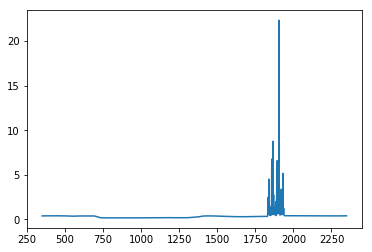

In [4]:
# in the first plot, can find noisy data in range (1800,2000), here are two thoughts to solve this, one is use LLE to reduce dimension 
# to the other is to remove data here.
Mean=np.mean(Wavelength,axis=0)
Sigma=np.std(Wavelength,axis=0)
T=Sigma/Mean
plt.plot(Y[0:2000],Sigma[0:2000])

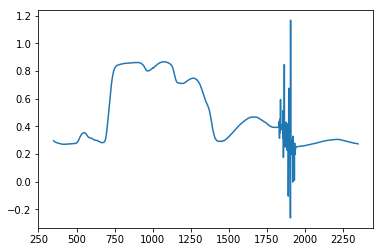

In [5]:
plt.plot(Y[0:2000],Mean[0:2000])

In [6]:
# in fact, the data noisy is mainly for mud class

In [7]:
Wavelength_w = Wavelength[0:220]
xw=np.std(Wavelength_w,axis=0)
xw_mean=np.mean(Wavelength_w,axis=0)

Wavelength_r = Wavelength[220:470]
xr=np.std(Wavelength_r,axis=0)
xr_mean=np.mean(Wavelength_r,axis=0)

Wavelength_b = Wavelength[470:800]
xb=np.std(Wavelength_b,axis=0)
xb_mean=np.mean(Wavelength_b,axis=0)

Wavelength_m = Wavelength[800:841]
xm=np.std(Wavelength_m,axis=0)
xm_mean=np.mean(Wavelength_m,axis=0)

In [8]:
# the mud class is very noisy in the range of (1800nm,2000nm), let us see the variance and the mean.

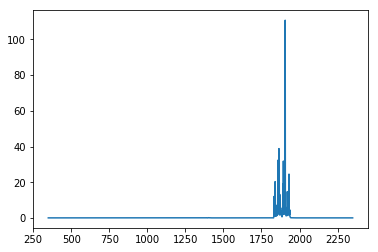

In [9]:
plt.plot(Y[0:2000],xm[0:2000])

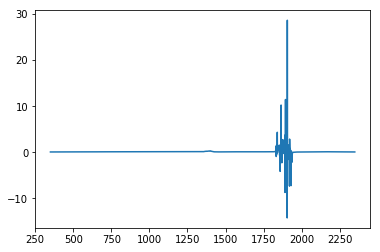

In [10]:
plt.plot(Y[0:2000],xm_mean[0:2000])

In [11]:
# then also see the other class.

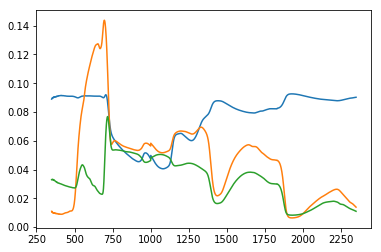

In [12]:
plt.plot(Y[0:2000],xw[0:2000])
plt.plot(Y[0:2000],xr[0:2000])
plt.plot(Y[0:2000],xb[0:2000])

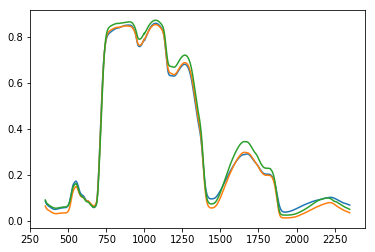

In [13]:
plt.plot(Y[0:2000],xw_mean[0:2000])
plt.plot(Y[0:2000],xr_mean[0:2000])
plt.plot(Y[0:2000],xb_mean[0:2000])

In [14]:
# just see from these plots, it seems difficult to get any useful imformation, but I can find the variance is not large.

In [15]:
# As required, I try teo wavelength range here,(400,900), (400,2400)
Y[50],Y[550],Y[2050],Y[1450],Y[1650]

(400.0, 900.0, 2400.0, 1800.0, 2000.0)

In [16]:
# for the range (400,2400), we can remove the noisy data,then see the effect.
# in fact,there are two methods to remove the noise. 
# remove the range (1800nm,2000nm), keep four classes.
# remove the mud samples, the problem is this may loss one class.(if this method's effect is not very good, we should not use this,
# since there are four class but this can just classify three class)

In [17]:
# remove the range (1800nm,2000nm), keep four classes.

In [18]:
x=Wavelength.T
wavelength2=np.vstack((x[0:1400],x[1650:2050])).T
wavelength2=wavelength2[0:841]
wavelength2.shape

(841, 1800)

In [19]:
# remove the mud samples

In [20]:
x=Wavelength.T
wavelength3=x[50:2050].T
wavelength3=wavelength3[0:800]
wavelength3.shape

(800, 2000)

In [21]:
# wave range (400nm,900nm)

In [22]:
x=Wavelength.T
wavelength1=x[50:550].T
wavelength1=wavelength1[0:841]
wavelength1.shape

(841, 500)

In [23]:
# in my idea, if we can classifyf our classes well, we don't need to consider the data with remove 1 class.

In [24]:
# target for four class(cloor).
from numpy import array
target=array([ "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M",
               "M","M","M","M","M","M","M","M","M","M","M" ])

In [25]:
# the target for three classes, remove the mud class.

In [26]:
Target=target[0:800]
Target.shape

(800,)

In [27]:
# I try different methods to reduce the dimension here. 
# In my idea, I should reduce the dimension and then find the good classifier 
# I should reduce the dimension for all the samples,not just the labeled data.
# I try some dimensions I should use and I showed their plots in some meetings. In this code I removed them, this is the next step 
# in my work.
# these dimensions reduction methods are ok and I have roughly compared them.

In [28]:
# these two are linear method.
pca=PCA(n_components=0.99)
X_PCA1=pca.fit_transform(wavelength1)
X_PCA2=pca.fit_transform(wavelength2)
X_PCA3=pca.fit_transform(wavelength3)

ICA = FastICA(n_components=20,random_state=100) 
X_ICA1=ICA.fit_transform(wavelength1)
X_ICA2=ICA.fit_transform(wavelength2)
X_ICA3=ICA.fit_transform(wavelength3)

In [29]:
# This is nonlinear method
lle1=LocallyLinearEmbedding(n_components=20,n_neighbors=50)
lle2=LocallyLinearEmbedding(n_components=20,n_neighbors=50)
lle3=LocallyLinearEmbedding(n_components=20,n_neighbors=50)

X_lle1=lle1.fit_transform(wavelength1)
X_lle2=lle2.fit_transform(wavelength2)
X_lle3=lle3.fit_transform(wavelength3)

In [30]:
# split train data,and test data at random
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_PCA1,target, test_size=0.3)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_ICA1,target, test_size=0.3)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_lle1,target, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(wavelength1,target, test_size=0.3)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_PCA2,target, test_size=0.3)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_ICA2,target, test_size=0.3)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_lle2,target, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(wavelength2,target, test_size=0.3)

xpca3_train, xpca3_test, ypca3_train, ypca3_test = train_test_split(X_PCA3,Target, test_size=0.3)
xIca3_train, xIca3_test, yIca3_train, yIca3_test = train_test_split(X_ICA3,Target, test_size=0.3)
xlle3_train, xlle3_test, ylle3_train, ylle3_test = train_test_split(X_lle3,Target, test_size=0.3)
x3_train, x3_test, y3_train, y3_test = train_test_split(wavelength3,Target, test_size=0.3)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [32]:
# accuracy= predict right/ all samples.
# kappa and F1 score are used to estimate the accuracy in each class.

In [33]:
# there are some kinds of machine learning models, like, netural network, tree model(can be improved by ensemble), svm model, naivebayes,
# knn(unsupervised machine learning, classify the unlabeled samples, not suitable for my data), logistic regression clasifier( good but
# this model should classifier the positive data),but after reduce the dimension, the data can be negative, so the logistic regression 
# classifier may not a good choice.
# other models are just the improvement based on these models, like adding boosting or bagging.
# so we just cinsider four main kinds of models: svm, decision tree, naive bayes,netural network.

In [34]:
# first let us see the naive bayes model, from the coffee data, I find the GaussianNB is better, so I just consider this method.

In [35]:
# for all data, three kinds

In [36]:
gnb = GaussianNB()
gnb.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, gnb.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, gnb.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, gnb.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, gnb.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, gnb.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, gnb.predict(x1_test),average='weighted'))

accuracy_train： 0.5782312925170068
accuracy_test： 0.5810276679841897
Kappa_train： 0.35644682954384976
Kappa_test： 0.36143057837464576
F1_train： 0.5224695625832938
F1_test： 0.5151306870125958


In [37]:
gnb = GaussianNB()
gnb.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, gnb.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, gnb.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, gnb.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, gnb.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, gnb.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, gnb.predict(x2_test),average='weighted'))

accuracy_train： 0.7670068027210885
accuracy_test： 0.7193675889328063
Kappa_train： 0.6548142434760252
Kappa_test： 0.5918798564093243
F1_train： 0.7651523339612671
F1_test： 0.7174140076670577


In [38]:
gnb = GaussianNB()
gnb.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, gnb.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, gnb.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, gnb.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, gnb.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, gnb.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, gnb.predict(x3_test),average='weighted'))

accuracy_train： 0.5696428571428571
accuracy_test： 0.55
Kappa_train： 0.3033423667570009
Kappa_test： 0.29359823399558505
F1_train： 0.5084763035183444
F1_test： 0.4759607055673675


In [39]:
# consider PCA, find it not good.

In [40]:
gnb = GaussianNB()
gnb.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, gnb.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, gnb.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, gnb.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, gnb.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, gnb.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, gnb.predict(xpca1_test),average='weighted'))

accuracy_train： 0.4812925170068027
accuracy_test： 0.45849802371541504
Kappa_train： 0.19938929661970328
Kappa_test： 0.14684815516774574
F1_train： 0.4197356385134788
F1_test： 0.3832313339741103


In [41]:
gnb = GaussianNB()
gnb.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, gnb.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, gnb.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, gnb.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, gnb.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, gnb.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, gnb.predict(xpca2_test),average='weighted'))

accuracy_train： 0.5629251700680272
accuracy_test： 0.6561264822134387
Kappa_train： 0.3498205849704418
Kappa_test： 0.4598262491410622
F1_train： 0.5346835177949117
F1_test： 0.6349583679725948


In [42]:
gnb = GaussianNB()
gnb.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, gnb.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, gnb.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, gnb.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, gnb.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, gnb.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, gnb.predict(xpca3_test),average='weighted'))

accuracy_train： 0.7035714285714286
accuracy_test： 0.6625
Kappa_train： 0.5291066399205722
Kappa_test： 0.47560087399854334
F1_train： 0.6980282650468447
F1_test： 0.6534201422473916


In [43]:
# then using ICA method, its effect is better.

In [44]:
gnb = GaussianNB()
gnb.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, gnb.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, gnb.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, gnb.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, gnb.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, gnb.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, gnb.predict(xIca1_test),average='weighted'))

accuracy_train： 0.7551020408163265
accuracy_test： 0.7430830039525692
Kappa_train： 0.6358130892574496
Kappa_test： 0.6214231451000253
F1_train： 0.7248323713635116
F1_test： 0.7229231796147423


In [47]:
gnb = GaussianNB()
gnb.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, gnb.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, gnb.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, gnb.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, gnb.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, gnb.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, gnb.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, gnb.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, gnb.predict(xIca2_test)))

accuracy_train： 0.8945578231292517
accuracy_test： 0.9051383399209486
Kappa_train： 0.8446472859297895
Kappa_test： 0.8605228097578904
F1_train： 0.8931168526876198
F1_test： 0.9018620177947773
confusion_matrix_train：
[[228   1   3   1]
 [  0  29   0   0]
 [ 34   0 143   5]
 [  6   0  12 126]]
confusion_matrix_test：
[[96  0  1  0]
 [ 0 12  0  0]
 [17  0 48  3]
 [ 2  0  1 73]]


In [46]:
scores = cross_val_score(gnb,X_ICA2,target, cv=20)
sum(scores)/20

0.8803646934460889

In [49]:
gnb = GaussianNB()
gnb.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, gnb.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, gnb.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, gnb.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, gnb.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, gnb.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, gnb.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, gnb.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, gnb.predict(xIca3_test)))

accuracy_train： 0.9589285714285715
accuracy_test： 0.925
Kappa_train： 0.9369486679916584
Kappa_test： 0.8860699403977003
F1_train： 0.9588044159230602
F1_test： 0.9249454365079365
confusion_matrix_train：
[[232   2   0]
 [  9 168   2]
 [  5   5 137]]
confusion_matrix_test：
[[91  5  0]
 [ 7 62  2]
 [ 2  2 69]]


In [51]:
scores = cross_val_score(gnb,X_ICA3,Target, cv=20)
sum(scores)/20

0.9395872420262666

In [52]:
# here I find for naive bayes model, the range (400,900) is not good, (400,2400) can be good.
# ICA is a good method to reduce dimension.
# then I also use the cross valid to see the effect.

In [53]:
gnb = GaussianNB()
gnb.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, gnb.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, gnb.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, gnb.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, gnb.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, gnb.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, gnb.predict(xlle1_test),average='weighted'))

accuracy_train： 0.782312925170068
accuracy_test： 0.782608695652174
Kappa_train： 0.6756770732337922
Kappa_test： 0.6801737611473753
F1_train： 0.7805262493521598
F1_test： 0.7765349061384735


In [55]:
gnb = GaussianNB()
gnb.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, gnb.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, gnb.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, gnb.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, gnb.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, gnb.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, gnb.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, gnb.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, gnb.predict(xlle2_test)))

accuracy_train： 0.9115646258503401
accuracy_test： 0.8814229249011858
Kappa_train： 0.8698572413616978
Kappa_test： 0.8257895703268454
F1_train： 0.9108894030286782
F1_test： 0.8795639635158667
confusion_matrix_train：
[[228   0   4   0]
 [  0  28   0   1]
 [ 31   0 135   4]
 [ 11   0   1 145]]
confusion_matrix_test：
[[93  0  4  1]
 [ 0 12  0  0]
 [20  0 58  2]
 [ 3  0  0 60]]


In [56]:
scores = cross_val_score(gnb,X_lle2,target, cv=20)
sum(scores)/20

0.8870372041458261

In [57]:
gnb = GaussianNB()
gnb.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, gnb.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, gnb.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, gnb.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, gnb.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, gnb.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, gnb.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle3_train, gnb.predict(xlle3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle3_test, gnb.predict(xlle3_test)))

accuracy_train： 0.9375
accuracy_test： 0.8958333333333334
Kappa_train： 0.9046516379486481
Kappa_test： 0.8394348105330764
F1_train： 0.9373453947660259
F1_test： 0.8947021313766597
confusion_matrix_train：
[[222   6   0]
 [ 14 156   4]
 [  5   6 147]]
confusion_matrix_test：
[[97  4  1]
 [11 61  4]
 [ 2  3 57]]


In [58]:
scores = cross_val_score(gnb,X_lle3,Target, cv=20)
sum(scores)/20

0.9080362726704193

In [59]:
# here I find ICA is a quite good method, then consider a way to improve the naive bayes model.
# we can also find this model seems not good nough, the bagging is a way to improvement overfitting, but we can find the naive bayes 
# model is not overfitting, so I think we can considr boosting, which is a method to improve the model acuracy.

In [60]:
bdt = AdaBoostClassifier(GaussianNB(),algorithm="SAMME",n_estimators=500, learning_rate=0.6)

In [61]:
bdt.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, bdt.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, bdt.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, bdt.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, bdt.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, bdt.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, bdt.predict(x1_test),average='weighted'))

accuracy_train： 0.6292517006802721
accuracy_test： 0.6442687747035574
Kappa_train： 0.43828220858895706
Kappa_test： 0.4701817251087791
F1_train： 0.5605575179238191
F1_test： 0.5913075671810761


In [64]:
bdt.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, bdt.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, bdt.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, bdt.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, bdt.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, bdt.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, bdt.predict(x2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, bdt.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, bdt.predict(x2_test)))

accuracy_train： 0.9523809523809523
accuracy_test： 0.924901185770751
Kappa_train： 0.9307676781268923
Kappa_test： 0.8917293571782513
F1_train： 0.9524744418774286
F1_test： 0.9253517138938083
confusion_matrix_train：
[[216   0  20   1]
 [  0  29   0   0]
 [  5   0 164   2]
 [  0   0   0 151]]
confusion_matrix_test：
[[84  0  9  0]
 [ 0 12  0  0]
 [ 4  0 73  2]
 [ 0  2  2 65]]


In [66]:
# this is good but runs slow.

In [65]:
bdt.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, bdt.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, bdt.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, bdt.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, bdt.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, bdt.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, bdt.predict(x3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y3_train, bdt.predict(x3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y3_test, bdt.predict(x3_test)))

accuracy_train： 0.6196428571428572
accuracy_test： 0.5625
Kappa_train： 0.3859838774438644
Kappa_test： 0.31322050527348544
F1_train： 0.5579674510714077
F1_test： 0.4884607055673675
confusion_matrix_train：
[[202  25   8]
 [ 42 134   3]
 [110  25  11]]
confusion_matrix_test：
[[82 10  3]
 [20 49  2]
 [58 12  4]]


In [67]:
# here we find if we don't remove the dimension, remove the mud class is the best.

In [68]:
bdt.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, bdt.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, bdt.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, bdt.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, bdt.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, bdt.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, bdt.predict(xpca1_test),average='weighted'))

accuracy_train： 0.7125850340136054
accuracy_test： 0.6758893280632411
Kappa_train： 0.5876612059951203
Kappa_test： 0.5265091863517061
F1_train： 0.7173397429909693
F1_test： 0.6787696315646626


In [69]:
bdt.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, bdt.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, bdt.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, bdt.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, bdt.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, bdt.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, bdt.predict(xpca2_test),average='weighted'))

accuracy_train： 0.6479591836734694
accuracy_test： 0.6758893280632411
Kappa_train： 0.47949024974341437
Kappa_test： 0.5133588233914288
F1_train： 0.6180390406403199
F1_test： 0.660781271955412


In [70]:
bdt.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, bdt.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, bdt.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, bdt.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, bdt.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, bdt.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, bdt.predict(xpca3_test),average='weighted'))

accuracy_train： 0.9267857142857143
accuracy_test： 0.8541666666666666
Kappa_train： 0.8877854238348452
Kappa_test： 0.7798280561962675
F1_train： 0.9268940181458508
F1_test： 0.855833576784497


In [71]:
# if use ICA to reduce dimension, all the three conditions ar good.

In [75]:
bdt.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, bdt.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, bdt.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, bdt.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, bdt.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, bdt.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, bdt.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, bdt.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, bdt.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.924901185770751
Kappa_train： 1.0
Kappa_test： 0.8913770506620871
F1_train： 1.0
F1_test： 0.9255047716621833
confusion_matrix_train：
[[230   0   0   0]
 [  0  26   0   0]
 [  0   0 178   0]
 [  0   0   0 154]]
confusion_matrix_test：
[[94  0  6  0]
 [ 1 13  0  1]
 [ 0  0 66  6]
 [ 1  0  4 61]]


In [76]:
scores = cross_val_score(bdt,X_ICA1,target, cv=20)
sum(scores)/20

0.9319058423142371

In [85]:
Bdt = AdaBoostClassifier(GaussianNB(),algorithm="SAMME",n_estimators=40, learning_rate=0.1)

In [91]:
Bdt.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, Bdt.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, Bdt.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, Bdt.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, Bdt.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, Bdt.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, Bdt.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, Bdt.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, Bdt.predict(xIca2_test)))

accuracy_train： 0.9115646258503401
accuracy_test： 0.9011857707509882
Kappa_train： 0.8716006248635211
Kappa_test： 0.8531460413280706
F1_train： 0.9098645149613492
F1_test： 0.8993642291993118
confusion_matrix_train：
[[228   0   1   0]
 [  0  33   0   0]
 [  8   0 159   2]
 [  2   1  38 116]]
confusion_matrix_test：
[[97  1  3  0]
 [ 0  8  0  0]
 [ 2  0 77  2]
 [ 3  1 13 46]]


In [92]:
scores = cross_val_score(Bdt,X_ICA2,target, cv=20)
sum(scores)/20

0.8928982106945806

In [93]:
Bdt1 = AdaBoostClassifier(GaussianNB(),algorithm="SAMME",n_estimators=40, learning_rate=0.05)

In [94]:
Bdt1.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, Bdt1.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, Bdt1.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, Bdt1.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, Bdt1.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, Bdt1.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, Bdt1.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, Bdt1.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, Bdt1.predict(xIca3_test)))

accuracy_train： 0.9946428571428572
accuracy_test： 0.9375
Kappa_train： 0.9918060371947383
Kappa_test： 0.9053602881253451
F1_train： 0.994637282292481
F1_test： 0.9375694113914009
confusion_matrix_train：
[[234   0   0]
 [  3 176   0]
 [  0   0 147]]
confusion_matrix_test：
[[90  5  1]
 [ 4 65  2]
 [ 1  2 70]]


In [95]:
scores = cross_val_score(Bdt1,X_ICA3,Target, cv=20)
sum(scores)/20

0.9573483427141964

In [96]:
# now we can find all the three conditions, the ICA + boosting + naive bayes is quite good.
# range (400,900), the accuracy around 0.93.
# range (400,2400), if reduce the range (1800,2000), the accuracy is not very good, around 0.89.
# but if reduce the mud class, the accuracy can be  very good 0.95, but ther are just three classes, so if other classifier model can
# classify the 4 classes well, I think I should use other models. 

In [97]:
bdt.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, bdt.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, bdt.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, bdt.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, bdt.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, bdt.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, bdt.predict(xlle1_test),average='weighted'))

accuracy_train： 0.8197278911564626
accuracy_test： 0.7944664031620553
Kappa_train： 0.7332637191925331
Kappa_test： 0.7002915983233097
F1_train： 0.8171337147492778
F1_test： 0.7871647344891168


In [99]:
bdt.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, bdt.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, bdt.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, bdt.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, bdt.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, bdt.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, bdt.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, bdt.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, bdt.predict(xlle2_test)))

accuracy_train： 0.9421768707482994
accuracy_test： 0.9090909090909091
Kappa_train： 0.9156145926985856
Kappa_test： 0.8673671734324071
F1_train： 0.9412750738537561
F1_test： 0.9088551759314185
confusion_matrix_train：
[[232   0   0   0]
 [  0  29   0   0]
 [  5   1 159   5]
 [  8   2  13 134]]
confusion_matrix_test：
[[92  0  4  2]
 [ 0 12  0  0]
 [ 6  0 69  5]
 [ 2  0  4 57]]


In [100]:
scores = cross_val_score(bdt,X_lle2,target, cv=20)
sum(scores)/20

0.8905745629866448

In [102]:
bdt.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, bdt.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, bdt.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, bdt.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, bdt.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, bdt.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, bdt.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, bdt.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, bdt.predict(xIca3_test)))

accuracy_train： 0.9982142857142857
accuracy_test： 0.9541666666666667
Kappa_train： 0.9972857959887942
Kappa_test： 0.9293966623876765
F1_train： 0.9982136663744884
F1_test： 0.9539431820579362
confusion_matrix_train：
[[ 48 136  50]
 [ 65  87  27]
 [ 57  31  59]]
confusion_matrix_test：
[[16 51 29]
 [28 36  7]
 [27 16 30]]


In [103]:
scores = cross_val_score(bdt,X_lle3,Target, cv=20)
sum(scores)/20

0.9271419637273297

In [104]:
# now in summary, we can find ICA/lle + boost + naive bayes can get a good effect.
# range (400,900): accuracy around 0.92
# range (400,2400) four classes: accuracy around 0.89
# range (400,2400) three classes: accuracy around 0.95

# then we see othere models

In [105]:
# split train data,and test data at random
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_PCA1,target, test_size=0.3)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_ICA1,target, test_size=0.3)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_lle1,target, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(wavelength1,target, test_size=0.3)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_PCA2,target, test_size=0.3)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_ICA2,target, test_size=0.3)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_lle2,target, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(wavelength2,target, test_size=0.3)

xpca3_train, xpca3_test, ypca3_train, ypca3_test = train_test_split(X_PCA3,Target, test_size=0.3)
xIca3_train, xIca3_test, yIca3_train, yIca3_test = train_test_split(X_ICA3,Target, test_size=0.3)
xlle3_train, xlle3_test, ylle3_train, ylle3_test = train_test_split(X_lle3,Target, test_size=0.3)
x3_train, x3_test, y3_train, y3_test = train_test_split(wavelength3,Target, test_size=0.3)

In [106]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
# SVM model for two range (400,900) , (400,2400)
# Then is SVM model.

In [107]:
SVM= SVC(kernel='rbf')

# when choose kernel, I find linear and sigmod is bad, so I choose rbf, which is often used.
# for gussian kernel (rbf), there are C and gamma to choose
# I first limit their range, then find the good combination roughly.

# for svm model, the kernel can be any styles, but too difficult to find a good one, we often choose gusssian kernel(but it may not best)
# then the range of gamma is also difficult to deal with, gamma = 1/(2*sigma^2), so if gamma is large, this model will be meaningless,
# (can only explain the sample itself) what I want to say is just the gamma is difficult to set.
# so this model may difficult to design.
 
# ICA not a good choice here, since the data is very small after transfermation, so the sigma should be small, the the gamma 
# can be large, but it can be difficult to set a good range(if small, effect will be bad, if large, very easy to loss meaning)
# so here we just consider two kinds of methods to reduce dimensions.

In [108]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(xlle1_train, ylle1_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [109]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(xlle2_train, ylle2_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [110]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(xlle3_train, ylle3_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [111]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(x1_train, y1_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 0.9426684551178852, 'C': 7.017038286703826}

In [112]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(x2_train, y2_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 0.20309176209047358, 'C': 2.728333376486768}

In [113]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(x3_train, y3_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 0.20309176209047358, 'C': 2.728333376486768}

In [114]:
# first see PCA/LLE+ SVM model, we find the method is not good for the range (400,900), but good in range (400,2400)

In [115]:
clf1= SVC(C=7,kernel='rbf',gamma=1)
clf1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf1.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, clf1.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, clf1.predict(xpca1_test),average='weighted'))

accuracy_train： 0.8180272108843537
accuracy_test： 0.758893280632411
Kappa_train： 0.7364267042026946
Kappa_test： 0.6432995885915037
F1_train： 0.8179597737864945
F1_test： 0.7567235098888206


In [117]:
Clf1= SVC(C=6,kernel='rbf',gamma=1)
Clf1.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, Clf1.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, Clf1.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, Clf1.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, Clf1.predict(xpca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, Clf1.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, Clf1.predict(xpca2_test)))

accuracy_train： 0.9710884353741497
accuracy_test： 0.849802371541502
Kappa_train： 0.9579080343607883
Kappa_test： 0.7796722814254613
F1_train： 0.9710906615789999
F1_test： 0.849598228245495
confusion_matrix_train：
[[224   0   4   1]
 [  0  30   0   0]
 [  7   0 173   1]
 [  2   0   2 144]]
confusion_matrix_test：
[[88  0  9  4]
 [ 0 11  0  0]
 [ 6  0 59  4]
 [11  0  4 57]]


In [118]:
Clf1.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, Clf1.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, Clf1.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, Clf1.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, Clf1.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, Clf1.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, Clf1.predict(xpca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca3_train, Clf1.predict(xpca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca3_test, Clf1.predict(xpca3_test)))

accuracy_train： 0.9803571428571428
accuracy_test： 0.95
Kappa_train： 0.9701742578667816
Kappa_test： 0.9225681561542184
F1_train： 0.9802994211653965
F1_test： 0.9495496306084664
confusion_matrix_train：
[[223   4   0]
 [  5 165   2]
 [  0   0 161]]
confusion_matrix_test：
[[103   0   0]
 [  7  70   1]
 [  0   4  55]]


In [119]:
scores = cross_val_score(Clf1,X_PCA3,Target, cv=20)
sum(scores)/20

0.9182926829268295

In [120]:
clf3= SVC(C=1,kernel='rbf',gamma=1)
Clf3= SVC(C=1,kernel='rbf',gamma=1)

In [121]:
clf3.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf3.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf3.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf3.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf3.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, clf3.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, clf3.predict(xlle1_test),average='weighted'))

accuracy_train： 0.8197278911564626
accuracy_test： 0.758893280632411
Kappa_train： 0.7284892838473602
Kappa_test： 0.6437524526211306
F1_train： 0.8140661833128455
F1_test： 0.7524154049233232


In [123]:
Clf3.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, Clf3.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, Clf3.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, Clf3.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, Clf3.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, Clf3.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, Clf3.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, Clf3.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, Clf3.predict(xlle2_test)))

accuracy_train： 0.9404761904761905
accuracy_test： 0.9169960474308301
Kappa_train： 0.9130390690363309
Kappa_test： 0.8767714252580309
F1_train： 0.9402439473485663
F1_test： 0.9165254919983412
confusion_matrix_train：
[[231   0   2   0]
 [  0  33   0   0]
 [ 19   0 151   1]
 [  6   0   7 138]]
confusion_matrix_test：
[[97  0  0  0]
 [ 0  7  0  1]
 [13  0 66  0]
 [ 3  0  4 62]]


In [124]:
scores = cross_val_score(Clf3,X_ICA2,target, cv=20)
sum(scores)/20

0.9115408910431599

In [125]:
Clf3.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, Clf3.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, Clf3.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, Clf3.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, Clf3.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, Clf3.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, Clf3.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, Clf3.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, Clf3.predict(xIca3_test)))

accuracy_train： 0.9482142857142857
accuracy_test： 0.9375
Kappa_train： 0.9210915027598539
Kappa_test： 0.903303787268332
F1_train： 0.9483061420235962
F1_test： 0.9375086266390614
confusion_matrix_train：
[[104  99  35]
 [ 91  60  18]
 [ 70  30  53]]
confusion_matrix_test：
[[42 42  8]
 [46 31  4]
 [34 13 20]]


In [126]:
scores = cross_val_score(Clf3,X_lle3,Target, cv=20)
sum(scores)/20

0.9341463414634148

In [127]:
clf= SVC(C=1,kernel='rbf',gamma=1)
Clf= SVC(C=1,kernel='rbf',gamma=0.2)

In [128]:
clf.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, clf.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, clf.predict(x1_test),average='weighted'))

accuracy_train： 0.8469387755102041
accuracy_test： 0.7944664031620553
Kappa_train： 0.7747222340470818
Kappa_test： 0.6996552747528708
F1_train： 0.8447203112016848
F1_test： 0.7892279602941531


In [131]:
Clf.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, Clf.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, Clf.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, Clf.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, Clf.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, Clf.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, Clf.predict(x2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, Clf.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, Clf.predict(x2_test)))

accuracy_train： 0.9659863945578231
accuracy_test： 0.9565217391304348
Kappa_train： 0.9505487574113788
Kappa_test： 0.9358134600304442
F1_train： 0.9659781818033049
F1_test： 0.9565837402154538
confusion_matrix_train：
[[226   0   4   0]
 [  0  32   0   0]
 [  6   0 167   2]
 [  6   0   2 143]]
confusion_matrix_test：
[[98  0  2  0]
 [ 0  8  1  0]
 [ 5  0 70  0]
 [ 1  0  2 66]]


In [132]:
scores = cross_val_score(Clf,wavelength2,target, cv=20)
sum(scores)/20

0.9494611457742484

In [133]:
Clf.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, Clf.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, Clf.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, Clf.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, Clf.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, Clf.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, Clf.predict(x3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y3_train, Clf.predict(x3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y3_test, Clf.predict(x3_test)))

accuracy_train： 0.9696428571428571
accuracy_test： 0.95
Kappa_train： 0.9538513742789277
Kappa_test： 0.9230028873917228
F1_train： 0.9696012217989732
F1_test： 0.9502622183835486
confusion_matrix_train：
[[222   4   0]
 [  2 170   2]
 [  7   2 151]]
confusion_matrix_test：
[[98  6  0]
 [ 4 72  0]
 [ 1  1 58]]


In [134]:
scores = cross_val_score(Clf,wavelength3,Target, cv=20)
sum(scores)/20

0.9532520325203253

In [135]:
# after comparing svm models, I find this model is not very good,accuracy around 0.85 especially for data in range (400,900).
# for the range (400,2400),it seems remove the noisy data range (1800,2000) is a little better than remove the mud samples, accuracy 
# around 0.94.
# reduce can just have a little improvement for SVM model, the most benefit is runs faster after reducing the dimension.
# the bigest problem is SVM model is difficult to set the range of gamma.
# compared with naive bayes model, SVM model seems a litle bad.

In [136]:
# Then we consider the tree models, to avoid overfitting, roughly set a depth.
# consider different dimension reduction method, pca, Ica, lle.

In [137]:
# this decision tree model, I am sure it is bad than Random forest and GBDT, so no need to consider much.
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=8)

In [138]:
clf_tree.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf_tree.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf_tree.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf_tree.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf_tree.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, clf_tree.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, clf_tree.predict(x1_test),average='weighted'))

accuracy_train： 0.9251700680272109
accuracy_test： 0.766798418972332
Kappa_train： 0.8906434923748013
Kappa_test： 0.6582881212370946
F1_train： 0.9260556076016064
F1_test： 0.7655055024953297


In [139]:
clf_tree.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, clf_tree.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, clf_tree.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, clf_tree.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, clf_tree.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, clf_tree.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, clf_tree.predict(x2_test),average='weighted'))

accuracy_train： 0.9914965986394558
accuracy_test： 0.8616600790513834
Kappa_train： 0.987662144185051
Kappa_test： 0.7960382356328458
F1_train： 0.9915029075451554
F1_test： 0.8615525591654017


In [140]:
clf_tree.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, clf_tree.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, clf_tree.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, clf_tree.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, clf_tree.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, clf_tree.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, clf_tree.predict(x3_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.8416666666666667
Kappa_train： 1.0
Kappa_test： 0.758038841133397
F1_train： 1.0
F1_test： 0.8409902685363791


In [141]:
clf_tree.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf_tree.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf_tree.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, clf_tree.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, clf_tree.predict(xpca1_test),average='weighted'))

accuracy_train： 0.8231292517006803
accuracy_test： 0.5889328063241107
Kappa_train： 0.7454884464273823
Kappa_test： 0.40657209228895563
F1_train： 0.8239194028421195
F1_test： 0.5912856130047671


In [142]:
clf_tree.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, clf_tree.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, clf_tree.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, clf_tree.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, clf_tree.predict(xpca2_test),average='weighted'))

accuracy_train： 0.923469387755102
accuracy_test： 0.7549407114624506
Kappa_train： 0.8884306929440635
Kappa_test： 0.6364774044032445
F1_train： 0.9238415731034055
F1_test： 0.7545061653595073


In [143]:
clf_tree.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, clf_tree.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, clf_tree.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, clf_tree.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, clf_tree.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, clf_tree.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, clf_tree.predict(xpca3_test),average='weighted'))

accuracy_train： 0.9892857142857143
accuracy_test： 0.8208333333333333
Kappa_train： 0.9837079850268624
Kappa_test： 0.7242190214050934
F1_train： 0.98926049285163
F1_test： 0.8183990100105082


In [144]:
clf_tree.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf_tree.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf_tree.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, clf_tree.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, clf_tree.predict(xIca1_test),average='weighted'))

accuracy_train： 0.9574829931972789
accuracy_test： 0.7984189723320159
Kappa_train： 0.9379846269374531
Kappa_test： 0.7070363054287856
F1_train： 0.9575071371783906
F1_test： 0.8002255291823948


In [145]:
clf_tree.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, clf_tree.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, clf_tree.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, clf_tree.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, clf_tree.predict(xIca2_test),average='weighted'))

accuracy_train： 0.9863945578231292
accuracy_test： 0.8616600790513834
Kappa_train： 0.9801515637394724
Kappa_test： 0.7971874212684089
F1_train： 0.9864175018010061
F1_test： 0.8587559800710476


In [146]:
clf_tree.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, clf_tree.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, clf_tree.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, clf_tree.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, clf_tree.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, clf_tree.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, clf_tree.predict(xIca3_test),average='weighted'))

accuracy_train： 0.9964285714285714
accuracy_test： 0.9125
Kappa_train： 0.9945376245494759
Kappa_test： 0.8673684210526316
F1_train： 0.9964342685305356
F1_test： 0.9121917065899172


In [147]:
scores = cross_val_score(clf_tree,X_ICA3,Target, cv=20)
sum(scores)/20

0.9118824265165731

In [148]:
clf_tree.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf_tree.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf_tree.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, clf_tree.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, clf_tree.predict(xlle1_test),average='weighted'))

accuracy_train： 0.9523809523809523
accuracy_test： 0.766798418972332
Kappa_train： 0.9300458033430492
Kappa_test： 0.6615960099750624
F1_train： 0.9523041625497004
F1_test： 0.7659250913027523


In [149]:
clf_tree.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, clf_tree.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, clf_tree.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, clf_tree.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, clf_tree.predict(xlle2_test),average='weighted'))

accuracy_train： 0.9829931972789115
accuracy_test： 0.8893280632411067
Kappa_train： 0.9752891339429801
Kappa_test： 0.8373588024611994
F1_train： 0.9829278260941181
F1_test： 0.8893663800907776


In [150]:
clf_tree.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, clf_tree.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, clf_tree.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, clf_tree.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, clf_tree.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, clf_tree.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, clf_tree.predict(xlle3_test),average='weighted'))

accuracy_train： 0.9964285714285714
accuracy_test： 0.9041666666666667
Kappa_train： 0.994574799945748
Kappa_test： 0.8528117750579953
F1_train： 0.9964266963195533
F1_test： 0.9048294865878009


In [151]:
# for the model of decision tree, we can find it seems using the range of (400,900) is worse than the range of (400,2400).
# but the effect of the tree model is not good, so w consider to improve this.
# we can think adding boosting to the tree to improve the model, boosting is a good way to improve model.

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
bdt1 = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=8),algorithm="SAMME",n_estimators=100, learning_rate=0.6)

In [154]:
bdt1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, bdt1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, bdt1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, bdt1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, bdt1.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, bdt1.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, bdt1.predict(x1_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.8102766798418972
Kappa_train： 1.0
Kappa_test： 0.7224545766198149
F1_train： 1.0
F1_test： 0.8075330409417599


In [155]:
bdt1.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, bdt1.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, bdt1.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, bdt1.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, bdt1.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, bdt1.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, bdt1.predict(x2_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.9209486166007905
Kappa_train： 1.0
Kappa_test： 0.8833133474771699
F1_train： 1.0
F1_test： 0.9209893178164176


In [156]:
bdt1.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, bdt1.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, bdt1.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, bdt1.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, bdt1.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, bdt1.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, bdt1.predict(x3_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.8875
Kappa_train： 1.0
Kappa_test： 0.8278061224489797
F1_train： 1.0
F1_test： 0.8869857513369456


In [157]:
bdt1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, bdt1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, bdt1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, bdt1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, bdt1.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, bdt1.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, bdt1.predict(xpca1_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.7075098814229249
Kappa_train： 1.0
Kappa_test： 0.5714024083146376
F1_train： 1.0
F1_test： 0.7086965352773512


In [158]:
bdt1.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, bdt1.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, bdt1.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, bdt1.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, bdt1.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, bdt1.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, bdt1.predict(xpca2_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.8379446640316206
Kappa_train： 1.0
Kappa_test： 0.7611008751727315
F1_train： 1.0
F1_test： 0.8379115394080796


In [159]:
bdt1.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, bdt1.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, bdt1.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, bdt1.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, bdt1.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, bdt1.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, bdt1.predict(xpca3_test),average='weighted'))

accuracy_train： 1.0
accuracy_test： 0.9125
Kappa_train： 1.0
Kappa_test： 0.8648141194141945
F1_train： 1.0
F1_test： 0.9121537349368479


In [162]:
# the PCA seems not good, then consider ICA, it is good.

In [163]:
bdt1.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, bdt1.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, bdt1.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, bdt1.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, bdt1.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, bdt1.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, bdt1.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, bdt1.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, bdt1.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9683794466403162
Kappa_train： 1.0
Kappa_test： 0.9535385533595023
F1_train： 1.0
F1_test： 0.9681241127146082
confusion_matrix_train：
[[224   0   0   0]
 [  0  28   0   0]
 [  0   0 186   0]
 [  0   0   0 150]]
confusion_matrix_test：
[[105   0   0   1]
 [  0  13   0   0]
 [  1   0  63   0]
 [  3   1   2  64]]


In [161]:
scores = cross_val_score(bdt1,X_ICA1,target, cv=20)
sum(scores)/20

0.9528927963698243

In [164]:
bdt1.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, bdt1.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, bdt1.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, bdt1.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, bdt1.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, bdt1.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, bdt1.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, bdt1.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, bdt1.predict(xIca2_test)))

accuracy_train： 1.0
accuracy_test： 0.9525691699604744
Kappa_train： 1.0
Kappa_test： 0.9304562946673997
F1_train： 1.0
F1_test： 0.951236334799888
confusion_matrix_train：
[[233   0   0   0]
 [  0  30   0   0]
 [  0   0 174   0]
 [  0   0   0 151]]
confusion_matrix_test：
[[97  0  0  0]
 [ 2  8  1  0]
 [ 4  0 67  5]
 [ 0  0  0 69]]


In [165]:
scores = cross_val_score(bdt1,X_ICA2,target, cv=20)
sum(scores)/20

0.9568349404424279

In [166]:
bdt1.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, bdt1.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, bdt1.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, bdt1.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, bdt1.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, bdt1.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, bdt1.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, bdt1.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, bdt1.predict(xIca3_test)))

accuracy_train： 0.9964285714285714
accuracy_test： 0.9166666666666666
Kappa_train： 0.9945376245494759
Kappa_test： 0.8737307307833956
F1_train： 0.9964342685305356
F1_test： 0.9164031270148292
confusion_matrix_train：
[[237   1   0]
 [  0 169   0]
 [  0   1 152]]
confusion_matrix_test：
[[88  3  1]
 [ 5 72  4]
 [ 3  4 60]]


In [167]:
scores = cross_val_score(bdt1,X_ICA3,Target, cv=20)
sum(scores)/20

0.9333646028767981

In [169]:
bdt1.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, bdt1.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, bdt1.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, bdt1.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, bdt1.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, bdt1.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, bdt1.predict(xlle1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, bdt1.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, bdt1.predict(xlle1_test)))

accuracy_train： 1.0
accuracy_test： 0.9011857707509882
Kappa_train： 1.0
Kappa_test： 0.8563773019369195
F1_train： 1.0
F1_test： 0.9005450523839881
confusion_matrix_train：
[[240   0   0   0]
 [  0  29   0   0]
 [  0   0 165   0]
 [  0   0   0 154]]
confusion_matrix_test：
[[87  0  2  1]
 [ 0 12  0  0]
 [ 8  0 73  4]
 [ 5  0  5 56]]


In [171]:
scores = cross_val_score(bdt1,X_lle1,target, cv=20)
sum(scores)/20

0.8818961738771722

In [170]:
bdt1.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, bdt1.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, bdt1.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, bdt1.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, bdt1.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, bdt1.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, bdt1.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, bdt1.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, bdt1.predict(xlle2_test)))

accuracy_train： 1.0
accuracy_test： 0.9446640316205533
Kappa_train： 1.0
Kappa_test： 0.9183362921633274
F1_train： 1.0
F1_test： 0.9444658571677064
confusion_matrix_train：
[[233   0   0   0]
 [  0  33   0   0]
 [  0   0 171   0]
 [  0   0   0 151]]
confusion_matrix_test：
[[95  0  1  1]
 [ 0  7  0  1]
 [ 5  0 72  2]
 [ 2  0  2 65]]


In [172]:
scores = cross_val_score(bdt1,X_lle2,target, cv=20)
sum(scores)/20

0.9485213736915383

In [174]:
bdt1.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, bdt1.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, bdt1.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, bdt1.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, bdt1.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, bdt1.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, bdt1.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle3_train, bdt1.predict(xlle3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle3_test, bdt1.predict(xlle3_test)))

accuracy_train： 1.0
accuracy_test： 0.925
Kappa_train： 1.0
Kappa_test： 0.8849288796547866
F1_train： 1.0
F1_test： 0.9254047542763938
confusion_matrix_train：
[[224   0   0]
 [  0 183   0]
 [  0   0 153]]
confusion_matrix_test：
[[96 10  0]
 [ 3 62  2]
 [ 3  0 64]]


In [175]:
scores = cross_val_score(bdt1,X_lle3,Target, cv=20)
sum(scores)/20

0.9331144465290808

In [176]:
# now we can find for boost decision tree, the effect is much better, for range (400,900), the accuracy is around 0.94,
# for range (400,2400), the two methods almost the same effect, accuracy around 0.94.
# but it may overfit, so we consider the bagging method.

In [177]:
# split train data,and test data at random
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_PCA1,target, test_size=0.3)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_ICA1,target, test_size=0.3)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_lle1,target, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(wavelength1,target, test_size=0.3)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_PCA2,target, test_size=0.3)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_ICA2,target, test_size=0.3)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_lle2,target, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(wavelength2,target, test_size=0.3)

xpca3_train, xpca3_test, ypca3_train, ypca3_test = train_test_split(X_PCA3,Target, test_size=0.3)
xIca3_train, xIca3_test, yIca3_train, yIca3_test = train_test_split(X_ICA3,Target, test_size=0.3)
xlle3_train, xlle3_test, ylle3_train, ylle3_test = train_test_split(X_lle3,Target, test_size=0.3)
x3_train, x3_test, y3_train, y3_test = train_test_split(wavelength3,Target, test_size=0.3)

In [178]:
# Random Forest is a improvement of Decision Tree , too avoid overfitting, I choose set the max depth.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
randomforest = RandomForestClassifier(max_depth=10)

In [179]:
randomforest.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, randomforest.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, randomforest.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, randomforest.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, randomforest.predict(xpca1_test),average='weighted'))

accuracy_train： 0.9370748299319728
accuracy_test： 0.7075098814229249
Kappa_train： 0.9090719115962986
Kappa_test： 0.5736472945891784
F1_train： 0.9381411293329078
F1_test： 0.7104496173733397


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [180]:
randomforest.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, randomforest.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, randomforest.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, randomforest.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, randomforest.predict(xpca2_test),average='weighted'))

accuracy_train： 0.9540816326530612
accuracy_test： 0.782608695652174
Kappa_train： 0.9330228319748899
Kappa_test： 0.6766735599600344
F1_train： 0.9542834462973476
F1_test： 0.7833639002438779


In [181]:
randomforest.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, randomforest.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, randomforest.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, randomforest.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, randomforest.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, randomforest.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, randomforest.predict(xpca3_test),average='weighted'))

accuracy_train： 0.9892857142857143
accuracy_test： 0.8833333333333333
Kappa_train： 0.9837010303277257
Kappa_test： 0.8220857271451643
F1_train： 0.9893033232141558
F1_test： 0.88518928593057


In [187]:
randomforest.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, randomforest.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, randomforest.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, randomforest.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, randomforest.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, randomforest.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, randomforest.predict(xIca1_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.8735177865612648
Kappa_train： 0.9975501224938753
Kappa_test： 0.8090385885460892
F1_train： 0.9982996138480695
F1_test： 0.8721900736401902
confusion_matrix_train：
[[222   0   0   0]
 [  0  34   0   0]
 [  0   0 175   1]
 [  0   0   0 156]]
confusion_matrix_test：
[[102   0   3   3]
 [  0   7   0   0]
 [  8   0  63   3]
 [  5   0  10  49]]


In [185]:
scores = cross_val_score(randomforest,X_ICA1,target, cv=20)
sum(scores)/20

0.881582271953798

In [188]:
randomforest.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, randomforest.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, randomforest.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, randomforest.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, randomforest.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, randomforest.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, randomforest.predict(xIca2_test)))

accuracy_train： 0.9914965986394558
accuracy_test： 0.9130434782608695
Kappa_train： 0.9875314893508741
Kappa_test： 0.8730325288562435
F1_train： 0.9914426040208635
F1_test： 0.9108660927540259
confusion_matrix_train：
[[229   0   0   0]
 [  2  22   0   0]
 [  1   0 178   1]
 [  1   0   0 154]]
confusion_matrix_test：
[[98  0  3  0]
 [ 3 11  2  1]
 [ 6  0 60  4]
 [ 2  0  1 62]]


In [151]:
scores = cross_val_score(randomforest,X_ICA2,target, cv=20)
sum(scores)/20

0.922316041870778

In [189]:
randomforest.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, randomforest.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, randomforest.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, randomforest.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, randomforest.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, randomforest.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, randomforest.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, randomforest.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, randomforest.predict(xIca3_test)))

accuracy_train： 0.9982142857142857
accuracy_test： 0.9166666666666666
Kappa_train： 0.9972707157547933
Kappa_test： 0.873471109236609
F1_train： 0.9982148471031065
F1_test： 0.9166742252456539
confusion_matrix_train：
[[233   1   0]
 [  0 180   0]
 [  0   0 146]]
confusion_matrix_test：
[[92  4  0]
 [ 4 64  2]
 [ 4  6 64]]


In [190]:
scores = cross_val_score(randomforest,X_ICA3,Target, cv=20)
sum(scores)/20

0.9293308317698562

In [194]:
randomforest.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, randomforest.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, randomforest.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, randomforest.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, randomforest.predict(xlle1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, randomforest.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, randomforest.predict(xlle1_test)))

accuracy_train： 0.9965986394557823
accuracy_test： 0.8379446640316206
Kappa_train： 0.9951
Kappa_test： 0.758531588993901
F1_train： 0.9965934426748471
F1_test： 0.8408482749789907
confusion_matrix_train：
[[220   0   0   0]
 [  0  33   0   0]
 [  1   0 173   1]
 [  0   0   0 160]]
confusion_matrix_test：
[[96  0  4 10]
 [ 0  7  1  0]
 [ 2  0 63 10]
 [ 3  0 11 46]]


In [192]:
scores = cross_val_score(randomforest,X_lle1,target, cv=20)
sum(scores)/20

0.8348721188057547

In [195]:
randomforest.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, randomforest.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, randomforest.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, randomforest.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, randomforest.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, randomforest.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, randomforest.predict(xlle2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.924901185770751
Kappa_train： 0.9925115892071794
Kappa_test： 0.8923886277143497
F1_train： 0.9949016510107517
F1_test： 0.924755757611649
confusion_matrix_train：
[[235   0   0   0]
 [  0  25   0   0]
 [  2   0 175   0]
 [  1   0   0 150]]
confusion_matrix_test：
[[87  0  4  4]
 [ 0 16  0  0]
 [ 2  0 70  1]
 [ 4  0  4 61]]


In [196]:
scores = cross_val_score(randomforest,X_lle2,target, cv=20)
sum(scores)/20

0.9401020986954057

In [197]:
randomforest.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, randomforest.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, randomforest.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, randomforest.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, randomforest.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, randomforest.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, randomforest.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle3_train, randomforest.predict(xlle3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle3_test, randomforest.predict(xlle3_test)))

accuracy_train： 1.0
accuracy_test： 0.9208333333333333
Kappa_train： 1.0
Kappa_test： 0.8799936838780988
F1_train： 1.0
F1_test： 0.9208972189912235
confusion_matrix_train：
[[236   0   0]
 [  0 180   0]
 [  0   0 144]]
confusion_matrix_test：
[[90  4  0]
 [ 6 62  2]
 [ 3  4 69]]


In [198]:
scores = cross_val_score(randomforest,X_lle3,Target, cv=20)
sum(scores)/20

0.9268918073796124

In [199]:
randomforest.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, randomforest.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, randomforest.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, randomforest.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, randomforest.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, randomforest.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, randomforest.predict(x1_test),average='weighted'))

accuracy_train： 0.9812925170068028
accuracy_test： 0.7509881422924901
Kappa_train： 0.9729721824085179
Kappa_test： 0.6309562398703403
F1_train： 0.9813176083152189
F1_test： 0.7525298479582366


In [201]:
randomforest.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, randomforest.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, randomforest.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, randomforest.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, randomforest.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, randomforest.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, randomforest.predict(x2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, randomforest.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, randomforest.predict(x2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.8774703557312253
Kappa_train： 0.992598746318254
Kappa_test： 0.8193980703249131
F1_train： 0.9948965629708728
F1_test： 0.8779563683428966
confusion_matrix_train：
[[225   0   1   0]
 [  0  31   0   0]
 [  2   0 180   0]
 [  0   0   0 149]]
confusion_matrix_test：
[[93  0 10  1]
 [ 0 10  0  0]
 [ 8  0 59  1]
 [ 7  2  2 60]]


In [203]:
randomforest.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, randomforest.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, randomforest.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, randomforest.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, randomforest.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, randomforest.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, randomforest.predict(x3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y3_train, randomforest.predict(x3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y3_test, randomforest.predict(x3_test)))

accuracy_train： 0.9928571428571429
accuracy_test： 0.9166666666666666
Kappa_train： 0.9891865275719409
Kappa_test： 0.8699926870886487
F1_train： 0.9928497774539463
F1_test： 0.9164639859871592
confusion_matrix_train：
[[216   0   0]
 [  1 186   0]
 [  2   1 154]]
confusion_matrix_test：
[[102   8   4]
 [  1  62   0]
 [  6   1  56]]


In [204]:
# we canfind the accuracy of randomforest is round 0.92 in range (400,2400), in range (400,900) the accuracy is round 0.85
# we can find the random forest seems not as good as the boost decision tree, now we consider to a improvement of boost decision tree.

In [205]:
# The random forset used bagging to improve the method of decision tree, while the GBDT used the boosting to improve .
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.05)
GradientBoosting = GradientBoostingClassifier(max_depth=3,n_estimators=30,learning_rate=0.03)

In [206]:
GradientBoosting1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, GradientBoosting1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, GradientBoosting1.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, GradientBoosting1.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, GradientBoosting1.predict(x1_test),average='weighted'))

accuracy_train： 0.9183673469387755
accuracy_test： 0.7865612648221344
Kappa_train： 0.8817763703536153
Kappa_test： 0.6824858231849029
F1_train： 0.9180427858632143
F1_test： 0.7861940126741345


In [207]:
GradientBoosting1.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, GradientBoosting1.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, GradientBoosting1.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, GradientBoosting1.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, GradientBoosting1.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, GradientBoosting1.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, GradientBoosting1.predict(x2_test),average='weighted'))

accuracy_train： 0.9846938775510204
accuracy_test： 0.8932806324110671
Kappa_train： 0.9777798305355179
Kappa_test： 0.8433616143086449
F1_train： 0.9846710204778228
F1_test： 0.8939734947474163


In [208]:
GradientBoosting1.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, GradientBoosting1.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, GradientBoosting1.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, GradientBoosting1.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, GradientBoosting1.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, GradientBoosting1.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, GradientBoosting1.predict(x3_test),average='weighted'))

accuracy_train： 0.9857142857142858
accuracy_test： 0.925
Kappa_train： 0.9783823430065914
Kappa_test： 0.8831548198636806
F1_train： 0.9857275934957465
F1_test： 0.9253285917496442


In [209]:
GradientBoosting1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, GradientBoosting1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, GradientBoosting1.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, GradientBoosting1.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, GradientBoosting1.predict(xpca1_test),average='weighted'))

accuracy_train： 0.8469387755102041
accuracy_test： 0.7193675889328063
Kappa_train： 0.7767032076761438
Kappa_test： 0.5903347929209999
F1_train： 0.8470287595429739
F1_test： 0.7248341543190786


In [210]:
GradientBoosting.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, GradientBoosting.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, GradientBoosting.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, GradientBoosting.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, GradientBoosting.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, GradientBoosting.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, GradientBoosting.predict(xpca2_test),average='weighted'))

accuracy_train： 0.8401360544217688
accuracy_test： 0.7391304347826086
Kappa_train： 0.766741504751937
Kappa_test： 0.6125664168542194
F1_train： 0.8403445760059032
F1_test： 0.7392018872525392


In [211]:
GradientBoosting.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, GradientBoosting.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, GradientBoosting.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, GradientBoosting.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, GradientBoosting.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, GradientBoosting.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, GradientBoosting.predict(xpca3_test),average='weighted'))

accuracy_train： 0.925
accuracy_test： 0.8416666666666667
Kappa_train： 0.8854688618468146
Kappa_test： 0.7570267750099906
F1_train： 0.9247990057673156
F1_test： 0.8420071931176863


In [213]:
GradientBoosting1.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, GradientBoosting1.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, GradientBoosting1.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, GradientBoosting1.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, GradientBoosting1.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, GradientBoosting1.predict(xIca1_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.9209486166007905
Kappa_train： 0.9975494486259409
Kappa_test： 0.8812513200816691
F1_train： 0.9982988079831312
F1_test： 0.920587957269044
confusion_matrix_train：
[[222   0   0   0]
 [  0  34   0   0]
 [  1   0 175   0]
 [  0   0   0 156]]
confusion_matrix_test：
[[102   0   5   1]
 [  0   7   0   0]
 [  9   1  63   1]
 [  2   0   1  61]]


In [214]:
scores = cross_val_score(GradientBoosting1,X_ICA1,target, cv=20)
sum(scores)/20

0.916275202392616

In [215]:
GradientBoosting1.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, GradientBoosting1.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, GradientBoosting1.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, GradientBoosting1.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, GradientBoosting1.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, GradientBoosting1.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, GradientBoosting1.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, GradientBoosting1.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, GradientBoosting1.predict(xIca2_test)))

accuracy_train： 0.9965986394557823
accuracy_test： 0.9407114624505929
Kappa_train： 0.9950233176189791
Kappa_test： 0.9136499123984618
F1_train： 0.9965986394557823
F1_test： 0.93948903880254
confusion_matrix_train：
[[228   0   1   0]
 [  0  24   0   0]
 [  1   0 179   0]
 [  0   0   0 155]]
confusion_matrix_test：
[[100   0   1   0]
 [  3  13   0   1]
 [  6   0  61   3]
 [  0   0   1  64]]


In [216]:
scores = cross_val_score(GradientBoosting1, X_ICA2,target, cv=20)
sum(scores)/20

0.9284097354715619

In [217]:
GradientBoosting.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, GradientBoosting.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, GradientBoosting.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, GradientBoosting.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, GradientBoosting.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, GradientBoosting.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, GradientBoosting.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, GradientBoosting1.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, GradientBoosting1.predict(xIca3_test)))

accuracy_train： 0.9821428571428571
accuracy_test： 0.925
Kappa_train： 0.9726557159319518
Kappa_test： 0.8857868020304569
F1_train： 0.9821018703654226
F1_test： 0.9240115669864598
confusion_matrix_train：
[[ 98  19  90  27]
 [  0   0   0   0]
 [ 32 112  30   6]
 [ 25  67  14  40]]
confusion_matrix_test：
[[40  9 39  8]
 [ 0  0  0  0]
 [19 38 12  1]
 [11 33  9 21]]


In [218]:
scores = cross_val_score(GradientBoosting1,X_ICA3,Target, cv=20)
sum(scores)/20

0.9327392120075049

In [219]:
GradientBoosting1.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, GradientBoosting1.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, GradientBoosting1.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, GradientBoosting1.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, GradientBoosting1.predict(xlle1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, GradientBoosting1.predict(xlle1_test)))

accuracy_train： 0.967687074829932
accuracy_test： 0.849802371541502
Kappa_train： 0.9533946561541831
Kappa_test： 0.776095765988169
F1_train： 0.9675961876012655
F1_test： 0.8525822968742729
confusion_matrix_train：
[[217   0   2   1]
 [  0  33   0   0]
 [  3   0 169   3]
 [  5   0   5 150]]
confusion_matrix_test：
[[98  0  4  8]
 [ 0  7  1  0]
 [ 2  0 62 11]
 [ 2  0 10 48]]


In [220]:
scores = cross_val_score(GradientBoosting1,X_lle1,target, cv=20)
sum(scores)/20

0.8545847728561855

In [223]:
GradientBoosting.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, GradientBoosting.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, GradientBoosting.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, GradientBoosting1.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, GradientBoosting1.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, GradientBoosting1.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, GradientBoosting1.predict(xlle2_test)))

accuracy_train： 0.9625850340136054
accuracy_test： 0.9051383399209486
Kappa_train： 0.9450308500331447
Kappa_test： 0.8634830702819372
F1_train： 0.5535171141192432
F1_test： 0.5140046878301074
confusion_matrix_train：
[[155   0  39  41]
 [  1  24   0   0]
 [ 68   0  70  39]
 [ 38   0  34  79]]
confusion_matrix_test：
[[50  0 28 17]
 [ 0 16  0  0]
 [30  0 30 13]
 [19  0 16 34]]


In [222]:
scores = cross_val_score(GradientBoosting1,X_lle2,target, cv=20)
sum(scores)/20

0.9296595421028206

In [224]:
GradientBoosting.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, GradientBoosting.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, GradientBoosting.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, GradientBoosting.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, GradientBoosting.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, GradientBoosting.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, GradientBoosting.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle3_train, GradientBoosting1.predict(xlle3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle3_test, GradientBoosting1.predict(xlle3_test)))

accuracy_train： 0.9714285714285714
accuracy_test： 0.8958333333333334
Kappa_train： 0.9561480785419236
Kappa_test： 0.8421468034727704
F1_train： 0.9714035228713815
F1_test： 0.8956718933097122
confusion_matrix_train：
[[134   0  49  53]
 [  0   0   0   0]
 [ 54   0  64  62]
 [ 93   1  37  13]]
confusion_matrix_test：
[[50  0 23 21]
 [ 0  0  0  0]
 [33  0 21 16]
 [45  1 22  8]]


In [225]:
scores = cross_val_score(GradientBoosting1,X_lle3,Target, cv=20)
sum(scores)/20

0.9195121951219514

In [226]:
# now we find the for ICA + GBDT, is a good method, but seems this may still nobetter than boost tree, and the effect almost same 
# with the boost + naive bayes.

In [227]:
# I can also use sklearn to duild Netural Network, but it can be difficult to tell the meaning of the net.
# also the best net is difficult to find, I can just try some and find a roughly suitable one.
# I also find for DNN, reduce dimension is useless since the netural network can do this.

In [228]:
# split train data,and test data at random
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_PCA1,target, test_size=0.3)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_ICA1,target, test_size=0.3)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_lle1,target, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(wavelength1,target, test_size=0.3)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_PCA2,target, test_size=0.3)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_ICA2,target, test_size=0.3)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_lle2,target, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(wavelength2,target, test_size=0.3)

xpca3_train, xpca3_test, ypca3_train, ypca3_test = train_test_split(X_PCA3,Target, test_size=0.3)
xIca3_train, xIca3_test, yIca3_train, yIca3_test = train_test_split(X_ICA3,Target, test_size=0.3)
xlle3_train, xlle3_test, ylle3_train, ylle3_test = train_test_split(X_lle3,Target, test_size=0.3)
x3_train, x3_test, y3_train, y3_test = train_test_split(wavelength3,Target, test_size=0.3)

In [229]:
from sklearn.neural_network import MLPClassifier
MLP1=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=1000,beta_1=0.8,beta_2=0.8,hidden_layer_sizes=(40, ))
MLP2=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=1000,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(20, ))

In [230]:
MLP1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, MLP1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, MLP1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, MLP1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, MLP1.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, MLP1.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, MLP1.predict(x1_test),average='weighted'))

accuracy_train： 0.8061224489795918
accuracy_test： 0.7628458498023716
Kappa_train： 0.7154089785936877
Kappa_test： 0.6551880792295113
F1_train： 0.804864143392282
F1_test： 0.7594005224201018


In [231]:
MLP3=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=1000,beta_1=0.8,beta_2=0.8,hidden_layer_sizes=(8, ))

In [233]:
MLP3.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, MLP3.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, MLP3.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, MLP3.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, MLP3.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, MLP3.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, MLP3.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, MLP3.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, MLP3.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9644268774703557
Kappa_train： 1.0
Kappa_test： 0.9474437391806116
F1_train： 1.0
F1_test： 0.9642896985344445
confusion_matrix_train：
[[223   0   0   0]
 [  0  28   0   0]
 [  0   0 191   0]
 [  0   0   0 146]]
confusion_matrix_test：
[[106   0   1   0]
 [  0  12   1   0]
 [  2   0  54   3]
 [  0   0   2  72]]


In [234]:
scores = cross_val_score(MLP3,X_ICA1,target, cv=20)
sum(scores)/20

0.9651143453823547

In [235]:
import time
start =time.clock()

MLP3.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, MLP3.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, MLP3.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, MLP3.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, MLP3.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, MLP3.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, MLP3.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, MLP3.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, MLP3.predict(xIca1_test)))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 1.0
accuracy_test： 0.9644268774703557
Kappa_train： 1.0
Kappa_test： 0.9474437391806116
F1_train： 1.0
F1_test： 0.9642896985344445
confusion_matrix_train：
[[223   0   0   0]
 [  0  28   0   0]
 [  0   0 191   0]
 [  0   0   0 146]]
confusion_matrix_test：
[[106   0   1   0]
 [  0  12   1   0]
 [  2   0  54   3]
 [  0   0   2  72]]
Running time: 0.43447609999930137 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [236]:
MLP3.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, MLP3.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, MLP3.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, MLP3.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, MLP3.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, MLP3.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, MLP3.predict(xlle1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, MLP3.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, MLP3.predict(xlle1_test)))

accuracy_train： 0.923469387755102
accuracy_test： 0.8814229249011858
Kappa_train： 0.8880483346872461
Kappa_test： 0.8287957052308663
F1_train： 0.9234353741496599
F1_test： 0.8819721818625351
confusion_matrix_train：
[[216   0   9   7]
 [  0  26   0   0]
 [  8   0 165   5]
 [  8   0   8 136]]
confusion_matrix_test：
[[88  0  8  2]
 [ 0 14  0  1]
 [ 6  0 62  4]
 [ 3  0  6 59]]


In [237]:
# For netural network, range (400,900), the accuracy ca reach around 0.965, using ICA to reduce dimension

In [238]:
MLP2.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, MLP2.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, MLP2.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, MLP2.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, MLP2.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, MLP2.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, MLP2.predict(x2_test),average='weighted'))

accuracy_train： 0.7074829931972789
accuracy_test： 0.7628458498023716
Kappa_train： 0.5593164210581356
Kappa_test： 0.6368855400071762
F1_train： 0.6237407383335499
F1_test： 0.6875796536201233


In [239]:
MLP4=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=500,beta_1=0.8,beta_2=0.8,hidden_layer_sizes=(8, ))

In [240]:
MLP4.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, MLP4.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, MLP4.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, MLP4.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, MLP4.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, MLP4.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, MLP4.predict(xpca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, MLP4.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, MLP4.predict(xpca2_test)))

accuracy_train： 0.9506802721088435
accuracy_test： 0.9090909090909091
Kappa_train： 0.9275354312304783
Kappa_test： 0.8681933496421128
F1_train： 0.9506096865569211
F1_test： 0.9093002767676118
confusion_matrix_train：
[[226   0   6   2]
 [  0  27   0   0]
 [ 10   0 174   4]
 [  3   0   4 132]]
confusion_matrix_test：
[[88  1  6  1]
 [ 0 12  0  2]
 [ 6  0 55  1]
 [ 3  0  3 75]]


In [243]:
MLP4.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, MLP4.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, MLP4.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, MLP4.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, MLP4.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, MLP4.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, MLP4.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, MLP4.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, MLP4.predict(xIca2_test)))

accuracy_train： 1.0
accuracy_test： 0.9683794466403162
Kappa_train： 1.0
Kappa_test： 0.9539151620027778
F1_train： 1.0
F1_test： 0.9681905273675481
confusion_matrix_train：
[[229   0   0   0]
 [  0  27   0   0]
 [  0   0 174   0]
 [  0   0   0 158]]
confusion_matrix_test：
[[99  1  1  0]
 [ 1 12  0  1]
 [ 2  0 73  1]
 [ 0  0  1 61]]


In [244]:
scores = cross_val_score(MLP4,X_ICA2,target, cv=20)
sum(scores)/20

0.9474075697416595

In [245]:
MLP4.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, MLP4.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, MLP4.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, MLP4.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, MLP4.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, MLP4.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, MLP4.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, MLP4.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, MLP4.predict(xlle2_test)))

accuracy_train： 1.0
accuracy_test： 0.9407114624505929
Kappa_train： 1.0
Kappa_test： 0.914076120180225
F1_train： 1.0
F1_test： 0.9408985604095683
confusion_matrix_train：
[[236   0   0   0]
 [  0  28   0   0]
 [  0   0 170   0]
 [  0   0   0 154]]
confusion_matrix_test：
[[89  0  5  0]
 [ 0 12  1  0]
 [ 4  0 74  2]
 [ 1  0  2 63]]


In [246]:
scores = cross_val_score(MLP4,X_lle2,target, cv=20)
sum(scores)/20

0.9391281648017327

In [247]:
# the reduce dimension in netural network here is a good choice.
# the accuracy is around 0.93

In [248]:
MLP2.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, MLP2.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, MLP2.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, MLP2.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, MLP2.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, MLP2.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, MLP2.predict(x3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y3_train, MLP2.predict(x3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y3_test, MLP2.predict(x3_test)))

accuracy_train： 1.0
accuracy_test： 0.9666666666666667
Kappa_train： 1.0
Kappa_test： 0.9489823032364352
F1_train： 1.0
F1_test： 0.9666159099298635
confusion_matrix_train：
[[228   0   0]
 [  0 176   0]
 [  0   0 156]]
confusion_matrix_test：
[[99  3  0]
 [ 2 70  2]
 [ 1  0 63]]


In [249]:
import time
start =time.clock()

MLP2.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, MLP2.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, MLP2.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, MLP2.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, MLP2.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, MLP2.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, MLP2.predict(x3_test),average='weighted'))

end=time.clock()
print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


accuracy_train： 1.0
accuracy_test： 0.9666666666666667
Kappa_train： 1.0
Kappa_test： 0.9489823032364352
F1_train： 1.0
F1_test： 0.9666159099298635
Running time: 11.064747000000352 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


In [251]:
# then this method is good,ICA + DNN arruracy can reach 0.97 but has two bigest problem.
# the code runs slow,only classify 3 classes.

In [252]:
MLP5=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=200,beta_1=0.8,beta_2=0.8,hidden_layer_sizes=(5, ))

In [253]:
MLP5.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, MLP5.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, MLP5.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, MLP5.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, MLP5.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, MLP5.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, MLP5.predict(xpca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca3_train, MLP5.predict(xpca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca3_test, MLP5.predict(xpca3_test)))

accuracy_train： 0.9714285714285714
accuracy_test： 0.9291666666666667
Kappa_train： 0.956695310914135
Kappa_test： 0.8915037893897089
F1_train： 0.9714285714285714
F1_test： 0.9291079234298254
confusion_matrix_train：
[[217   6   0]
 [  6 170   2]
 [  0   2 157]]
confusion_matrix_test：
[[95 10  2]
 [ 3 67  2]
 [ 0  0 61]]


In [254]:
scores = cross_val_score(MLP5, X_PCA3,Target, cv=20)
sum(scores)/20

0.9373983739837399

In [255]:
MLP5.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, MLP5.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, MLP5.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, MLP5.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, MLP5.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, MLP5.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, MLP5.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, MLP5.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, MLP5.predict(xIca3_test)))

accuracy_train： 0.9964285714285714
accuracy_test： 0.9625
Kappa_train： 0.9945663247979352
Kappa_test： 0.9426249103514224
F1_train： 0.9964285714285714
F1_test： 0.9623490533510897
confusion_matrix_train：
[[229   0   1]
 [  0 173   0]
 [  1   0 156]]
confusion_matrix_test：
[[97  2  1]
 [ 6 71  0]
 [ 0  0 63]]


In [256]:
scores = cross_val_score(MLP5, X_ICA3,Target, cv=20)
sum(scores)/20

0.9873671044402752

In [257]:
MLP5.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, MLP5.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, MLP5.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, MLP5.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, MLP5.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, MLP5.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, MLP5.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle3_train, MLP5.predict(xlle3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle3_test, MLP5.predict(xlle3_test)))

accuracy_train： 0.9892857142857143
accuracy_test： 0.9625
Kappa_train： 0.9837027695591017
Kappa_test： 0.9427298759147311
F1_train： 0.9892911250206123
F1_test： 0.9626882901474921
confusion_matrix_train：
[[223   4   0]
 [  2 181   0]
 [  0   0 150]]
confusion_matrix_test：
[[98  4  1]
 [ 1 66  0]
 [ 1  2 67]]


In [258]:
scores = cross_val_score(MLP5, X_lle3,Target, cv=20)
sum(scores)/20

0.9252970606629145

In [259]:
# now we can find if we just classify 3 classes, the effect can be quite good using ICA to reduce the dimension,
# the problem is we can just classify 3 classes.

In [260]:
# now the problem of DNN is it runs a little slow and the hidden layer is a little difficult to design.
# the range (400,900), accuracy around 0.95, is worse than (400,2400) accuracy around 0.97,
# although when remove the mud class the effect is very good, I still think no need to use this method since it can only classify 3 class

In [261]:
from sklearn.model_selection import cross_val_score

In [265]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [263]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [266]:
from pandas import DataFrame
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree

In [267]:
# Then try a improvement of xgboost.it add bagging to the GBDT and has some other improvement.

In [268]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 4)

In [269]:
xgboost.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, xgboost.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, xgboost.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, xgboost.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, xgboost.predict(x1_test)))
print ('F1_train：', f1_score(y1_train, xgboost.predict(x1_train),average='weighted'))
print ('F1_test：', f1_score(y1_test, xgboost.predict(x1_test),average='weighted'))

accuracy_train： 0.9982993197278912
accuracy_test： 0.766798418972332
Kappa_train： 0.9975139733301764
Kappa_test： 0.6613656987295826
F1_train： 0.9982866109079701
F1_test： 0.7664341644398761


In [271]:
xgboost.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, xgboost.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, xgboost.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, xgboost.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, xgboost.predict(x2_test)))
print ('F1_train：', f1_score(y2_train, xgboost.predict(x2_train),average='weighted'))
print ('F1_test：', f1_score(y2_test, xgboost.predict(x2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y2_train, xgboost.predict(x2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y2_test, xgboost.predict(x2_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.9683794466403162
Kappa_train： 0.997517520898421
Kappa_test： 0.9540855678054535
F1_train： 0.9982867611829095
F1_test： 0.9684938584118573
confusion_matrix_train：
[[229   0   0   0]
 [  0  27   0   1]
 [  0   0 185   0]
 [  0   0   0 146]]
confusion_matrix_test：
[[96  0  3  2]
 [ 0 13  0  0]
 [ 1  0 64  0]
 [ 0  0  2 72]]


In [274]:
scores = cross_val_score(xgboost, wavelength2,target, cv=20)
sum(scores)/20

0.9317582375083795

In [275]:
xgboost.fit(x3_train, y3_train)
print ('accuracy_train：', accuracy_score(y3_train, xgboost.predict(x3_train)))
print ('accuracy_test：', accuracy_score(y3_test, xgboost.predict(x3_test)))

print ('Kappa_train：', cohen_kappa_score(y3_train, xgboost.predict(x3_train)))
print ('Kappa_test：', cohen_kappa_score(y3_test, xgboost.predict(x3_test)))
print ('F1_train：', f1_score(y3_train, xgboost.predict(x3_train),average='weighted'))
print ('F1_test：', f1_score(y3_test, xgboost.predict(x3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(y3_train, xgboost.predict(x3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(y3_test, xgboost.predict(x3_test)))

accuracy_train： 1.0
accuracy_test： 0.9541666666666667
Kappa_train： 1.0
Kappa_test： 0.9299214270545764
F1_train： 1.0
F1_test： 0.9540749562424439
confusion_matrix_train：
[[228   0   0]
 [  0 176   0]
 [  0   0 156]]
confusion_matrix_test：
[[97  4  1]
 [ 3 69  2]
 [ 1  0 63]]


In [276]:
scores = cross_val_score(xgboost, wavelength3,Target, cv=20)
sum(scores)/20

0.9395872420262666

In [277]:
xgboost.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, xgboost.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, xgboost.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, xgboost.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, xgboost.predict(xpca1_test)))
print ('F1_train：', f1_score(ypca1_train, xgboost.predict(xpca1_train),average='weighted'))
print ('F1_test：', f1_score(ypca1_test, xgboost.predict(xpca1_test),average='weighted'))


accuracy_train： 0.9778911564625851
accuracy_test： 0.7154150197628458
Kappa_train： 0.9679577464788732
Kappa_test： 0.5822880598041689
F1_train： 0.9778992905669097
F1_test： 0.7185988081518428


In [278]:
xgboost.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, xgboost.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, xgboost.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, xgboost.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, xgboost.predict(xpca2_test)))
print ('F1_train：', f1_score(ypca2_train, xgboost.predict(xpca2_train),average='weighted'))
print ('F1_test：', f1_score(ypca2_test, xgboost.predict(xpca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca2_train, xgboost.predict(xpca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca2_test, xgboost.predict(xpca2_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.8893280632411067
Kappa_train： 0.9975031741111428
Kappa_test： 0.8391827468785471
F1_train： 0.99829806299988
F1_test： 0.8897083348583422
confusion_matrix_train：
[[234   0   0   0]
 [  0  27   0   0]
 [  0   0 188   0]
 [  1   0   0 138]]
confusion_matrix_test：
[[86  0  6  4]
 [ 0 13  0  1]
 [ 6  0 55  1]
 [ 9  0  1 71]]


In [279]:
xgboost.fit(xpca3_train, ypca3_train)
print ('accuracy_train：', accuracy_score(ypca3_train, xgboost.predict(xpca3_train)))
print ('accuracy_test：', accuracy_score(ypca3_test, xgboost.predict(xpca3_test)))

print ('Kappa_train：', cohen_kappa_score(ypca3_train, xgboost.predict(xpca3_train)))
print ('Kappa_test：', cohen_kappa_score(ypca3_test, xgboost.predict(xpca3_test)))
print ('F1_train：', f1_score(ypca3_train, xgboost.predict(xpca3_train),average='weighted'))
print ('F1_test：', f1_score(ypca3_test, xgboost.predict(xpca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ypca3_train, xgboost.predict(xpca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ypca3_test, xgboost.predict(xpca3_test)))

accuracy_train： 1.0
accuracy_test： 0.9
Kappa_train： 1.0
Kappa_test： 0.8461209660183799
F1_train： 1.0
F1_test： 0.9002767763679189
confusion_matrix_train：
[[223   0   0]
 [  0 178   0]
 [  0   0 159]]
confusion_matrix_test：
[[94 12  1]
 [ 7 63  2]
 [ 1  1 59]]


In [281]:
xgboost.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, xgboost.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, xgboost.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, xgboost.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, xgboost.predict(xIca1_test)))
print ('F1_train：', f1_score(yIca1_train, xgboost.predict(xIca1_train),average='weighted'))
print ('F1_test：', f1_score(yIca1_test, xgboost.predict(xIca1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca1_train, xgboost.predict(xIca1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca1_test, xgboost.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9288537549407114
Kappa_train： 1.0
Kappa_test： 0.8951585054216451
F1_train： 1.0
F1_test： 0.9288532379475947
confusion_matrix_train：
[[223   0   0   0]
 [  0  28   0   0]
 [  0   0 191   0]
 [  0   0   0 146]]
confusion_matrix_test：
[[101   0   3   3]
 [  0  13   0   0]
 [  2   0  52   5]
 [  3   0   2  69]]


In [284]:
scores = cross_val_score(xgboost, X_ICA1,target, cv=20)
sum(scores)/20

0.9481281905842316

In [282]:
xgboost.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, xgboost.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, xgboost.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, xgboost.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, xgboost.predict(xIca2_test)))
print ('F1_train：', f1_score(yIca2_train, xgboost.predict(xIca2_train),average='weighted'))
print ('F1_test：', f1_score(yIca2_test, xgboost.predict(xIca2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca2_train, xgboost.predict(xIca2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca2_test, xgboost.predict(xIca2_test)))

accuracy_train： 1.0
accuracy_test： 0.9644268774703557
Kappa_train： 1.0
Kappa_test： 0.9480575769327281
F1_train： 1.0
F1_test： 0.9638530247863081
confusion_matrix_train：
[[229   0   0   0]
 [  0  27   0   0]
 [  0   0 174   0]
 [  0   0   0 158]]
confusion_matrix_test：
[[99  0  1  1]
 [ 0 11  1  2]
 [ 3  0 72  1]
 [ 0  0  0 62]]


In [285]:
scores = cross_val_score(xgboost, X_ICA2,target, cv=20)
sum(scores)/20

0.9578275666477595

In [283]:
xgboost.fit(xIca3_train, yIca3_train)
print ('accuracy_train：', accuracy_score(yIca3_train, xgboost.predict(xIca3_train)))
print ('accuracy_test：', accuracy_score(yIca3_test, xgboost.predict(xIca3_test)))

print ('Kappa_train：', cohen_kappa_score(yIca3_train, xgboost.predict(xIca3_train)))
print ('Kappa_test：', cohen_kappa_score(yIca3_test, xgboost.predict(xIca3_test)))
print ('F1_train：', f1_score(yIca3_train, xgboost.predict(xIca3_train),average='weighted'))
print ('F1_test：', f1_score(yIca3_test, xgboost.predict(xIca3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca3_train, xgboost.predict(xIca3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca3_test, xgboost.predict(xIca3_test)))

accuracy_train： 1.0
accuracy_test： 0.9583333333333334
Kappa_train： 1.0
Kappa_test： 0.936336145153589
F1_train： 1.0
F1_test： 0.9583068693946029
confusion_matrix_train：
[[230   0   0]
 [  0 173   0]
 [  0   0 157]]
confusion_matrix_test：
[[98  1  1]
 [ 2 71  4]
 [ 2  0 61]]


In [286]:
scores = cross_val_score(xgboost, X_ICA3,Target, cv=20)
sum(scores)/20

0.9634459036898061

In [287]:
xgboost.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, xgboost.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, xgboost.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, xgboost.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, xgboost.predict(xlle1_test)))
print ('F1_train：', f1_score(ylle1_train, xgboost.predict(xlle1_train),average='weighted'))
print ('F1_test：', f1_score(ylle1_test, xgboost.predict(xlle1_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle1_train, xgboost.predict(xlle1_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle1_test, xgboost.predict(xlle1_test)))

accuracy_train： 1.0
accuracy_test： 0.8893280632411067
Kappa_train： 1.0
Kappa_test： 0.83949246629659
F1_train： 1.0
F1_test： 0.888843523955671
confusion_matrix_train：
[[232   0   0   0]
 [  0  26   0   0]
 [  0   0 178   0]
 [  0   0   0 152]]
confusion_matrix_test：
[[93  0  3  2]
 [ 0 14  0  1]
 [ 7  0 62  3]
 [ 4  0  8 56]]


In [288]:
xgboost.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, xgboost.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, xgboost.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, xgboost.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, xgboost.predict(xlle2_test)))
print ('F1_train：', f1_score(ylle2_train, xgboost.predict(xlle2_train),average='weighted'))
print ('F1_test：', f1_score(ylle2_test, xgboost.predict(xlle2_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle2_train, xgboost.predict(xlle2_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle2_test, xgboost.predict(xlle2_test)))

accuracy_train： 1.0
accuracy_test： 0.9486166007905138
Kappa_train： 1.0
Kappa_test： 0.9256218905472637
F1_train： 1.0
F1_test： 0.9486863642190558
confusion_matrix_train：
[[236   0   0   0]
 [  0  28   0   0]
 [  0   0 170   0]
 [  0   0   0 154]]
confusion_matrix_test：
[[89  0  5  0]
 [ 0 13  0  0]
 [ 5  0 74  1]
 [ 1  0  1 64]]


In [289]:
xgboost.fit(xlle3_train, ylle3_train)
print ('accuracy_train：', accuracy_score(ylle3_train, xgboost.predict(xlle3_train)))
print ('accuracy_test：', accuracy_score(ylle3_test, xgboost.predict(xlle3_test)))

print ('Kappa_train：', cohen_kappa_score(ylle3_train, xgboost.predict(xlle3_train)))
print ('Kappa_test：', cohen_kappa_score(ylle3_test, xgboost.predict(xlle3_test)))
print ('F1_train：', f1_score(ylle3_train, xgboost.predict(xlle3_train),average='weighted'))
print ('F1_test：', f1_score(ylle3_test, xgboost.predict(xlle3_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(ylle3_train, xgboost.predict(xlle3_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(ylle3_test, xgboost.predict(xlle3_test)))

accuracy_train： 1.0
accuracy_test： 0.9625
Kappa_train： 1.0
Kappa_test： 0.9425149700598803
F1_train： 1.0
F1_test： 0.962526172225299
confusion_matrix_train：
[[227   0   0]
 [  0 183   0]
 [  0   0 150]]
confusion_matrix_test：
[[100   3   0]
 [  1  65   1]
 [  3   1  66]]


In [240]:
# from these trying, I can find the xgboost has a good effect.
# ICA is good, so consider further for these two methods.
# first consider the dimension to choose.
# The get the mean of accuracy.
# I choose to consider range (400,900), and (400,2400) for the classify of four classes
# remove the mud class is a idea, but if we do so , we can just classify three classes, so if we can classify 4 classes well, we 
# have no need to consider this method.

In [241]:
# PCA
pca=PCA(n_components=0.99)
X_Pca1=pca.fit_transform(wavelength1)
X_Pca2=pca.fit_transform(wavelength2)
X_Pca1.shape, X_Pca2.shape

((841, 4), (841, 5))

In [242]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 4)

In [232]:
from sklearn.metrics import accuracy_score
Scores=[]

for i in range(2,25):
    ICA = FastICA(n_components=i,random_state=100) 
    X_ICA=ICA.fit_transform(wavelength1)
    summary=0
    n=40
    for j in range(0,40):
        xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.3)
        xgboost.fit(xIca_train, yIca_train)
        summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
    a = summary/n
    Scores.append(a)  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider 

In [233]:
Scores

[0.5020750988142292,
 0.7312252964426876,
 0.7563241106719367,
 0.7804347826086955,
 0.8069169960474311,
 0.8529644268774705,
 0.9322134387351779,
 0.934189723320158,
 0.9447628458498027,
 0.9444664031620554,
 0.9376482213438735,
 0.9469367588932809,
 0.9367588932806326,
 0.9455533596837947,
 0.947529644268775,
 0.9417984189723321,
 0.951778656126482,
 0.9526679841897236,
 0.9550395256916998,
 0.9540513833992099,
 0.9494071146245062,
 0.9575098814229251,
 0.9581027667984191]

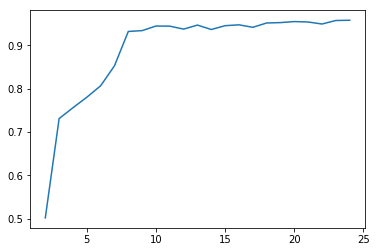

In [234]:
N=array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.plot(N,Scores)

In [243]:
# so I can find the dimension can be choose as 23 , when the wavelength is in the range of (400nm,900nm).

In [244]:
ICA1 = FastICA(n_components=23,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
scores = cross_val_score(xgboost , X_ICA1,target, cv=30)
sum(scores)/30

0.9639506172839507

In [237]:
# another method to calculate the mean accuracy.

In [238]:
ICA1 = FastICA(n_components=23,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA1,target, test_size=0.3)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
a = summary/n
a

0.9604743083003952

In [143]:
# Now can find the accuracy is around 0.95.

In [145]:
from sklearn.metrics import accuracy_score
scores=[]

for i in range(2,25):
    ICA = FastICA(n_components=i,random_state=100) 
    X_ICA=ICA.fit_transform(wavelength2)
    summary=0
    n=50
    for j in range(0,50):
        xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.3)
        xgboost.fit(xIca_train, yIca_train)
        summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
    a = summary/n
    scores.append(a) 

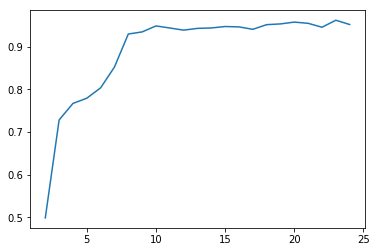

In [149]:
N=array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.plot(N,Scores)

In [96]:
# so I can find the dimension can be choose as 23 , when the wavelength is (400nm,2400nm).

In [228]:
ICA2 = FastICA(n_components=23,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
scores = cross_val_score(xgboost, X_ICA2,target, cv=30)
sum(scores)/30

0.9747354497354495

In [266]:
ICA2 = FastICA(n_components=23,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
summary=0
n=100
for j in range(0,100):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA2,target, test_size=0.3)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
b = summary/n
b

0.9646245059288532

In [154]:
# Now can find the accuracy is around 0.96.

In [155]:
# Then calculate the time.

In [156]:
import time
start =time.clock()

ICA1 = FastICA(n_components=23,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA1,target, test_size=0.3)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
a = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Running time: 21.953937099999166 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [157]:
import time
start =time.clock()

ICA2 = FastICA(n_components=23,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA2,target, test_size=0.3)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
b = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 24.033795700001065 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [158]:
# If also calculate the running time of GBDT using this method, we can find xgboost is much faster.

In [159]:
import time
start =time.clock()

GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.05)
ICA1 = FastICA(n_components=23,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA1,target, test_size=0.3)
    GradientBoosting1.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test))+summary
a = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Running time: 48.936224799996126 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


In [160]:
import time
start =time.clock()

GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.05)
ICA2 = FastICA(n_components=23,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA2,target, test_size=0.3)
    GradientBoosting1.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test))+summary
b = summary/n
end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 38.64773799999966 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [161]:
# Now I can find the classification effect is quite good, around 0.96.
# and also find the suitable dimension.
# For all the work, I also find the the xgboost model a little overfitting, and the parameters can be improved.
# Now we consider this.

In [162]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [163]:
# first consider the wavelength (400nm,900nm).
# first try to find the suitable value of n_estimators.

In [164]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 4)

In [189]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 50, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 70}
best score:0.9667063020214031


In [166]:
# Then lets think deeper for the n_estimators.

In [190]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'n_estimators': [64,66,68,70,72,74,76]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                 "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 70}
best score:0.9667063020214031


In [168]:
# # so now I can choose the n_estimator = 70.
# The we try to estimate the suitable value of max_depth and min_child_weight.

In [191]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                 "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'max_depth': 4, 'min_child_weight': 1}
best score:0.9667063020214031


In [115]:
# so now I can choose the max_depth = 4, the min_child_weight = 1.
# Then we try to estimate the best value of gamma.

In [192]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.1}
best score:0.9667063020214031


In [117]:
# Now let us consider further.

In [195]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'gamma': [0.06,0.08,0.1,0.12,0.14]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.1, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.08}
best score:0.9678953626634959


In [173]:
# so now we can choose gamma = 0.08.
# Then we can try to estimate subsample and colsample_bytree.

In [196]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'subsample': [0.4,0.5,0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.08, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'colsample_bytree': 0.7, 'subsample': 0.4}
best score:0.9726516052318668


In [197]:
# Then we can choose subsample = 0.4 , and colsample_bytree = 0.7.
# Next step we try to estimate reg_lambda.

In [198]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'reg_lambda': [0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.08, "subsample": 0.4, "colsample_bytree": 0.7,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'reg_lambda': 1}
best score:0.9726516052318668


In [177]:
# Now the suitablle value of reg_lambda is about 1.
# Next is the last step and I should estimate the suitable value of learning_rate.

In [201]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.08, "subsample": 0.4, "colsample_bytree": 0.7,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 70, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'learning_rate': 0.3}
best score:0.9726516052318668


In [202]:
# so the learning_rate = 0.3 is a good choice.
# Now here is the new classifier model.
xgboost = XGBClassifier(
    n_estimators=70,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.08,
    subsample=0.4,
    colsample_bytree=0.7,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 4)

ICA1 = FastICA(n_components=23,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)

In [205]:
# So I can find the accuracy just improved a little, around 0.96.
# Now we can see the accuracy, kappa again, in addition we can also see the confuse matrix.

In [226]:
from sklearn.metrics import f1_score
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.3)
xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9604743083003953
Kappa_train： 1.0
Kappa_test： 0.9422136951258508
F1_train： 1.0
F1_test： 0.9603897782969953
confusion_matrix_train：
[[229   0   0   0]
 [  0  29   0   0]
 [  0   0 186   0]
 [  0   0   0 144]]
confusion_matrix_test：
[[99  0  2  0]
 [ 0 12  0  0]
 [ 1  0 60  3]
 [ 3  1  0 72]]


In [208]:
# Now consider the other wavelength range.

In [230]:
Xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 4)

In [231]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'n_estimators': [20, 30, 40, 50, 60,70 ,80, 90, 100]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 50, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 60}
best score:0.9714625445897741


In [139]:
# Then think further for n_estimators.

In [232]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'n_estimators': [54,56,58,60,62,64,66]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 60}
best score:0.9714625445897741


In [141]:
# # so now I can choose the n_estimator = 60.
# The we try to estimate the suitable value of max_depth and min_child_weight.

In [233]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'max_depth': 2, 'min_child_weight': 3}
best score:0.9738406658739596


In [143]:
# so now I can choose the max_depth = 2, the min_child_weight = 3.
# just a little improvement, so maybe no need to change
# Then we try to estimate the best value of gamma.

In [234]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

best parameter：{'gamma': 0.2}
best score:0.9738406658739596


In [146]:
# Then consider further for gamma.

In [235]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'gamma': [0.14,0.16,0.18,0.2,0.22,0.24,0.26]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

best parameter：{'gamma': 0.18}
best score:0.9738406658739596


In [147]:
# so now we can choose gamma = 0.18.
# Then we can try to estimate subsample and colsample_bytree.

In [236]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'subsample': [0.4,0.5,0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.18, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'colsample_bytree': 0.7, 'subsample': 0.5}
best score:0.9738406658739596


In [150]:
# Then we can choose subsample = 0.5 , and colsample_bytree = 0.7 .
# Next step we try to estimate reg_lambda.

In [237]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'reg_lambda': [0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.18, "subsample": 0.5, "colsample_bytree": 0.7,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'reg_lambda': 1}
best score:0.9738406658739596


In [238]:
# Now the suitablle value of reg_lambda is about 1.
# Next is the last step and I should estimate the suitable value of learning_rate.

In [239]:
ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.18, "subsample": 0.5, "colsample_bytree": 0.7,
                "objective": 'multi:softprob', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60, "num_class" : 4}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'learning_rate': 0.3}
best score:0.9738406658739596


In [258]:
# so the learning_rate = 0.3 is a good choice.
# Now here is the new classifier model.
Xgboost = XGBClassifier(
    n_estimators=60,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.18,
    subsample=0.5,
    colsample_bytree=0.7,
    objective= 'multi:softprob',
    nthread=12,
    reg_lambda=1,
    seed=27,
    num_class= 4)

ICA = FastICA(n_components=23,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

In [263]:
# So I can find the accuracy just improved a little, around 0.96.
# Now we can see the accuracy, kappa again, in addition we can also see the confuse matrix and F1 score.

In [264]:
from sklearn.metrics import f1_score
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.3)
Xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, Xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, Xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, Xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, Xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, Xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, Xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, Xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, Xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.9762845849802372
Kappa_train： 1.0
Kappa_test： 0.9655821335449496
F1_train： 1.0
F1_test： 0.9762657214317341
confusion_matrix_train：
[[229   0   0   0]
 [  0  26   0   0]
 [  0   0 174   0]
 [  0   0   0 159]]
confusion_matrix_test：
[[98  0  3  0]
 [ 0 14  0  1]
 [ 1  0 74  1]
 [ 0  0  0 61]]


In [225]:
# then we can also see how the tree is. Just as the coffee data code.
# now we don't plot the tree here.